# Extracting Personal Information from Green Card

## Importing essential libraries




In [ ]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from PIL import Image
import time
import random
import cv2
from datetime import datetime

##### YOLO architecture works by dividing an image into a grid and then predicting bounding boxes and class probabilities for objects within each grid cell. This enables YOLO to simultaneously predict multiple objects in a single pass, making it very efficient for real-time applications.

In [ ]:
!pip install ultralytics # for yolov5


In [ ]:
!pip install gdown # for downloading from drive
import gdown

##### PyTesseract is a Python wrapper for Google's Tesseract-OCR Engine. Tesseract is an open-source optical character recognition (OCR) engine that is widely used to recognize and extract text from images and scanned documents.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract

## Retrieving the data for use


*   Downloading folders and sections from Google Drive into colab lets you have the autonomy to share the colab project with others and won't error it due to lack of access explicitly to the data. <br>**Note**: Make sure the folders/files are set to share with anyone with the link
*   More info : https://pypi.org/project/gdown/

In [ ]:
# Extracting folder from google drive into colab
!gdown https://drive.google.com/drive/folders/1gFqWwWX3OSC8_mJZ7Yhz8aLx2AoyMTu5 --quiet --folder

In [ ]:
# Function to determine the number of rows and columns to skip based on 'NaN' values
def get_blank_rows_cols(directory,folder):
  file_name = folder+" - Ground Truth.xlsx"
  exact_path = folder + '/' + file_name
  file_path = os.path.join(directory, exact_path)
  df_temp = pd.read_excel(file_path,header=None)
  num_blank_rows = df_temp.isnull().all(axis=1).sum()
  num_blank_cols = df_temp.isnull().all(axis=0).sum()
  return file_path, num_blank_rows,num_blank_cols

## Data Exploration and Visualization

In [ ]:
# Read the .xlsx file into a pandas DataFrame
new_directory = "/content/Green Card"
file_path_train, num_blank_rows_train,num_blank_cols_train = get_blank_rows_cols(new_directory,"Training Data")
train_df = pd.read_excel(file_path_train, header=num_blank_rows_train, index_col=num_blank_cols_train).iloc[:, num_blank_cols_train:]
train_df.head(3)

,File Name,Customer ID,First Name /Given Name,Middle Name,Last Name / Surname,Title,Suffix,Date of Birth,Place of Birth,Gender,...,Weight,DD,Donor/Veteran,Signature of the holder,Verification Status,Verification Date,Verification Result,Additional Notes,Verification Method,Verification Confidence Level
Sr No,,,,,,,,,,,,,,,,,,,,,
1,S1_Front_Curr,CustID_001,TEST V,NaN,SPECIMEN,NaN,NaN,10/20/2002,Mexico,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S2_Front_Curr,CustID_002,JOCELYN,NaN,SMITH,NaN,NaN,2/21/1980,United Kingdom,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S3_Front_Curr,CustID_003,COSETTE,NaN,BERNARD,NaN,NaN,11/18/1942,French Republic,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# For test data
file_path_test, num_blank_rows_test,num_blank_cols_test = get_blank_rows_cols(new_directory,"Test Data")
test_df = pd.read_excel(file_path_test, header=num_blank_rows_test, index_col=num_blank_cols_test).iloc[:, num_blank_cols_test:]
test_df.head(3)

,File Name,Customer ID,First Name /Given Name,Middle Name,Last Name / Surname,Title,Suffix,Date of Birth,Place of Birth,Gender,...,Weight,DD,Donor/Veteran,Signature of the holder,Verification Status,Verification Date,Verification Result,Additional Notes,Verification Method,Verification Confidence Level
Sr No,,,,,,,,,,,,,,,,,,,,,
1,S3_Front_Blur,CustID_021,USAUSAUSAASA,NaN,SAASA,NaN,NaN,not clear,Colombia,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S4_Front_Blur,CustID_022,not clear,NaN,not clear,NaN,NaN,1990-09-20 00:00:00,Greece,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S5_Front_Blur,CustID_023,not clear,NaN,not clear,NaN,NaN,1976-08-17 00:00:00,Germany,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def rand_data_explore(directory, folder, num_images=1):
    # Define the path to the folder containing the images
    images_folder = os.path.join(directory, folder)
    # List all image files in the folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Get the number of images
    num_images_available = len(image_files)

    # Check if there are images in the folder
    if num_images_available == 0:
        print("No images found in the folder.")
        return

    # Limit the number of random images to explore based on the available images
    num_images_to_explore = min(num_images, num_images_available)

    # Randomly choose image files to explore
    random_image_files = random.sample(image_files, num_images_to_explore)

    for random_image_file in random_image_files:
        # Load the random image using PIL
        random_image_path = os.path.join(images_folder, random_image_file)
        random_image = Image.open(random_image_path)

        # Get image properties
        width, height = random_image.size
        num_channels = random_image.getbands()

        # Display the image and its properties
        plt.figure(figsize=(6, 6))
        plt.imshow(random_image)
        plt.axis('off')
        plt.title(f"Image: {random_image_file}\nSize: {width} x {height}\nChannels: {num_channels}")
        plt.show()



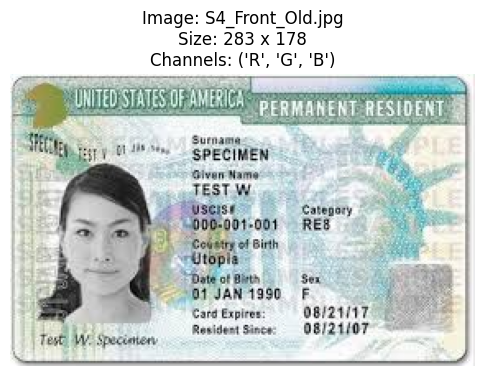

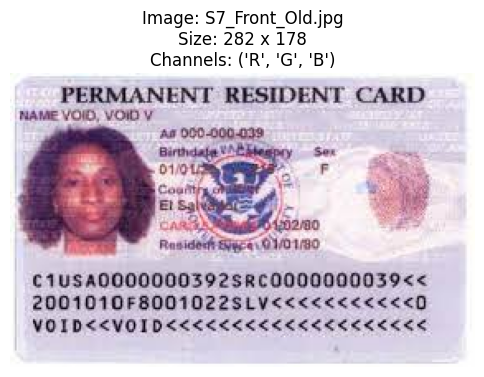

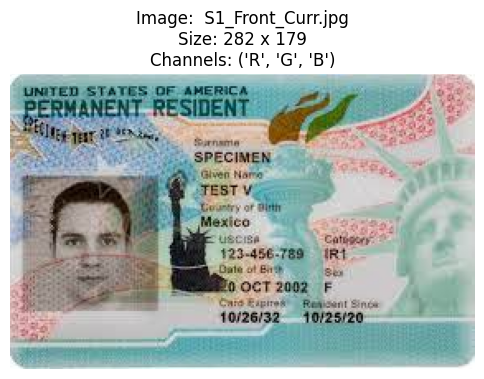

----------------------------------------


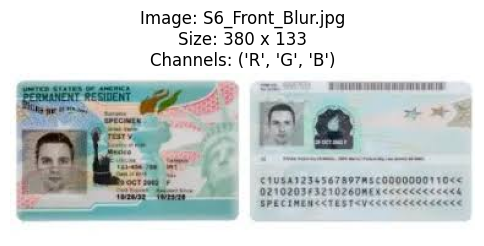

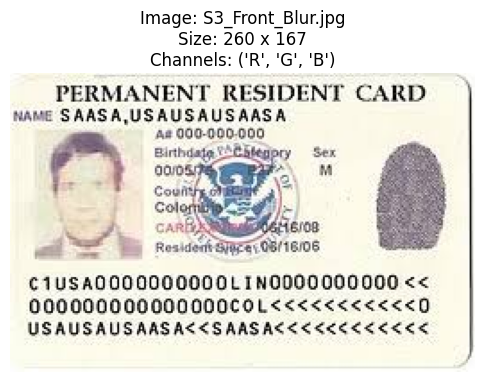

----------------------------------------


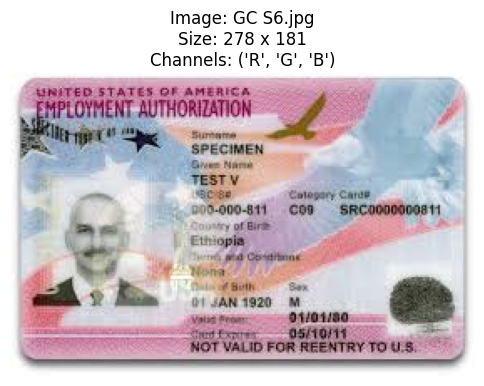

----------------------------------------


In [ ]:
# Print Information of a few random samples from the training set
rand_data_explore(new_directory,"Training Data", num_images=3)
print('-'*40)
rand_data_explore(new_directory,"Test Data",num_images=2)
print('-'*40)
rand_data_explore(new_directory,"Validation Data")
print('-'*40)

## Text Detection :


### Data Augmentation and label cleanup
https://albumentations.ai/docs/ provides a custom solution to augment data keeping bounding boxes constant. It is a very useful lirary when dealing with small datasets.

Use of https://roboflow.com/ or https://github.com/HumanSignal/labelImg/tree/master would be of help to get started.


**Note**: Take care to align the augmented data with the architechture in use. Several dependencies would be presnet with shift in architecture

*****Added the annotation zip file with the code to get that uploaded *****

In [ ]:
# !wget -O Dataset.zip https://drive.google.com/file/d/13sN0KScjHJzRE7pbuPB18FSxAVAKdD_I/view?usp=sharing

--2023-08-06 06:05:31--  https://drive.google.com/file/d/13sN0KScjHJzRE7pbuPB18FSxAVAKdD_I/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.198.139, 173.194.198.113, 173.194.198.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.198.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Dataset.zip’

Dataset.zip             [ <=>                ]  77.54K  --.-KB/s    in 0.001s  

2023-08-06 06:05:32 (52.9 MB/s) - ‘Dataset.zip’ saved [79398]

[Dataset.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Dataset.zip or
        Dataset.zip.zip, and cannot find Dataset.zip.ZIP, period.


#### Import yolov5 architechture
For text detection from https://github.com/ultralytics/yolov5 with pretrained weights.

In [ ]:
# import shutil

# # Replace 'folder_name' with the name of the folder you want to delete
# folder_name = '/content/yolov5'

# # Delete the folder
# shutil.rmtree(folder_name)


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo for yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 15874, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 15874 (delta 46), reused 45 (delta 15), pack-reused 15769
Receiving objects: 100% (15874/15874), 14.63 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (10860/10860), done.


In [ ]:
# Unzip the downloaded file (optional)
!unzip -q /content/annotated.zip -d /content/yolov5

In [ ]:
# Change the working directory to 'yolov5'
os.chdir("yolov5")

# Install dependencies from requirements.txt
!pip install -r requirements.txt

### Update necessary config or yaml files

Update the yaml file based on requirement. Here, data.yaml and yolov5l.yaml are updated

In [ ]:
# Define the file path
file_path = '/content/yolov5/models/yolov5l.yaml'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Update the nc parameter to 3 (only for the first occurrence)
for idx, line in enumerate(content):
    if 'nc:' in line:
        content[idx] = 'nc: 3  # number of classes\n'
        break  # Stop updating after the first occurrence is found

# Write the updated content back to the file
with open(file_path, 'w') as file:
    file.writelines(content)


In [ ]:
# Define the file path
file_path = '/content/yolov5/data.yaml'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Update the paths : For this use case  : our val dataset is acting as 'TEST'
for idx, line in enumerate(content):
    if line.startswith('val:'):
        content[idx] = 'val: ../test/images\n'
    elif line.startswith('test:'):
        content[idx] = 'test: ../valid/images\n'

# Write the updated content back to the file
with open(file_path, 'w') as file:
    file.writelines(content)


### Model Training & Performance

#### Pretrained model : Adam optimizer

trained for 300 epochs to compare differences with change in hyperparameters

In [ ]:
# Train YOLOv5l on DL for 300 epochs
#!python train.py --img 640 --batch 4 --epochs 300 --data data.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt --optimizer Adam

train: weights=yolov5l.pt, cfg=models/yolov5l.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

#### pretrained model : SGD optimizer

Works best for this use case as the model is pretrained on COCO dataset <br>
Better perfoming with 50 epochs than Adam ( 300 epochs )

In [ ]:
# Train YOLOv5l for 50 epochs
!python train.py --img 640 --batch 4 --epochs 50 --data data.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=models/yolov5l.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

In [ ]:
# Train YOLOv5l on green card dataset for 150 epochs
#!python train.py --img 640 --batch 4 --epochs 150 --data data.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt

In [ ]:
# Change the current working directory
new_directory = "/content"
os.chdir(new_directory)

# Check the current working directory to verify the change
print("Current working directory:", os.getcwd())

Current working directory: /content


### Text detection: evaluation

In [ ]:
# Function to check if a file is an image
def is_image_file(filename):
    img_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
    return any(filename.lower().endswith(ext) for ext in img_extensions)

In [ ]:
# Function to process image and get results
def process_image(image_path, model):
    im1 = Image.open(image_path)
    results = model(im1, augment=True)

    # Move the tensor from GPU to CPU
    results_cpu = results.xyxy[0].cpu().numpy()

    # Convert the numpy array to a list of detections
    results = [{'xyxy': [bbox[:4]], 'names': [f'class_{int(bbox[5])}'], 'scores': [bbox[4]]} for bbox in results_cpu]
    return results


In [ ]:
def process_data(image_dir, model):
    files = [file for file in os.listdir(image_dir) if is_image_file(file)]
    results = {}
    start_time = datetime.now()  # Record start time
    for filename in files:
        image_path = os.path.join(image_dir, filename)
        results[filename] = process_image(image_path, model)
    end_time = datetime.now()  # Record end time
    processing_time = end_time - start_time
    print(f"Processing time for {image_dir}: {processing_time}")
    return results

In [ ]:
model_path = "/content/yolov5/runs/train/exp/weights/best.pt"

In [ ]:
# Specify the directories for train, test, and validation data
train_dir = '/content/Green Card/Training Data'
test_dir = '/content/Green Card/Test Data'
val_dir = '/content/Green Card/Validation Data'

# Load the YOLOv5 model
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp2/weights/best.pt')
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
# Process train data
train_results = process_data(train_dir, model)

# Process test data
test_results = process_data(test_dir, model)

# Process validation data
valid_results = process_data(val_dir, model)



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-6 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46119048 parameters, 0 gradients
Adding AutoShape... 


Processing time for /content/Green Card/Training Data: 0:00:04.784178
Processing time for /content/Green Card/Test Data: 0:00:00.492578
Processing time for /content/Green Card/Validation Data: 0:00:00.461372


## Text Recognition

pytesseract allows the recognition of text from bounding boxes from images. Its the python wrapper class of tesseract

In [ ]:
# Function to perform text recognition on detected regions
def recognize_text(cropped_image):
    text = pytesseract.image_to_string(cropped_image)
    return text

In [ ]:
# Function to process results for a given set (train, test, or validation)
def process_results(image_dir, results):
    image_results = {}
    for filename, results in results.items():
        image_path = os.path.join(image_dir, filename)
        image = Image.open(image_path)

        # Initialize dictionaries to store highest probability detections for each class
        highest_prob_per_class = {class_name: (None, 0.0) for class_name in class_names}

        for result in results:
            bbox = result['xyxy'][0]
            class_index = int(result['names'][0].split('_')[1])
            class_name = class_names[class_index]
            confidence = result['scores'][0]
            x_min, y_min, x_max, y_max = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
            cropped_image = image.crop((x_min, y_min, x_max, y_max))
            text = recognize_text(cropped_image)

            # Update highest probability detection for each class
            if confidence > highest_prob_per_class[class_name][1]:
                highest_prob_per_class[class_name] = (text.strip(), confidence)

        # Store highest probability detections for each image
        image_results[filename] = highest_prob_per_class

    return image_results

In [ ]:
# Define the class names
class_names = ['dob', 'first_name', 'last_name']


# Function to print the results for a given set
def print_results(set_name, results):
    print(f"{set_name} Results:")
    for filename, detections in results.items():
        print(f"Results for {filename}:")
        for class_name, (text, confidence) in detections.items():
            if text:
                print(f"Detected Class: {class_name}, Detected Text: {text}, Confidence: {confidence:.2f}")
            else:
                text = "Not clear"
                print(f"Detected Class: {class_name}, Detected Text: {text}")
        print('-'*100)

# Process train data
train_results = process_results(train_dir, train_results)

# Process test data
test_results = process_results(test_dir, test_results)

# Process validation data
valid_results = process_results(val_dir, valid_results)

# Print the results for each set
print_results("Train", train_results)
print_results("Test", test_results)
print_results("Validation", valid_results)


Train Results:
Results for S4_Front_Old.jpg:
Detected Class: dob, Detected Text: Not clear
Detected Class: first_name, Detected Text: TEST W, Confidence: 0.68
Detected Class: last_name, Detected Text: SPECIMEN, Confidence: 0.65
----------------------------------------------------------------------------------------------------
Results for S8_Front_Old.jpg:
Detected Class: dob, Detected Text: 1 JAN 1920, Confidence: 0.63
Detected Class: first_name, Detected Text: TEST V, Confidence: 0.73
Detected Class: last_name, Detected Text: SPECIMEN, Confidence: 0.68
----------------------------------------------------------------------------------------------------
Results for S8_Front_Curr.jpg:
Detected Class: dob, Detected Text: Not clear
Detected Class: first_name, Detected Text: ‘MELETIS, Confidence: 0.58
Detected Class: last_name, Detected Text: Not clear
----------------------------------------------------------------------------------------------------
Results for S7_Front_Curr.jpg:
Detecte

### Export results to a csv file

In [ ]:
# Function to convert results to a DataFrame and save it to a CSV file for each class
def results_to_csv(results, set_name):
    save_path = "/content/outputfiles"
    data = []
    for filename, detections in results.items():
        row = [filename]
        for class_name in class_names:
            text, _ = detections[class_name]
            row.append(text if text else "Not clear")
        data.append(row)

    columns = ['File Name'] + class_names
    df = pd.DataFrame(data, columns=columns)
    df.set_index('File Name', inplace=True)

    # Create the directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)

    # Save the DataFrame to the specified path
    csv_path = f'{save_path}/{set_name}_results.csv'
    df.to_csv(csv_path)

    return df


In [ ]:
# Save the results to CSV files with the specified paths
train_results_df = results_to_csv(train_results, "Train")
test_results_df = results_to_csv(test_results, "Test")
validation_results_df = results_to_csv(valid_results, "Validation")


In [ ]:
import torch
import pickle


# Define the file path where you want to save the model's state dictionary
state_dict_path = '/content/best_model_greencard.pt'

# Save the model's state dictionary to the specified file path
torch.save(model.state_dict(), state_dict_path)

# Define the file path for saving the pickle file
pickle_path = '/content/akshara_greencard_pickle.pkl'

# Open a file in binary write mode and pickle the state dictionary
with open(pickle_path, 'wb') as file:
    pickle.dump(model.state_dict(), file)
